![](https://www.thewrap.com/wp-content/uploads/2016/06/iron-throne.jpg)

# Part 1, exploratory data analysis (EDA)

1. [1 балл] Загрузка данных - загрузите датасет, указав, что нулевой столбец - это индекс датасета. Посмотрите на его `head` и `tail`. После этого воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`. 
2. [1 балл] Сколько героев уже успело помереть? (целевая переменная - `isAlive`)
3. [1 балл] Какой средний возраст у железорождённых? А у жителей Дорна? (смотреть по переменной `culture`)
4. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
5. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. 
6. [2 балла] Визуализация - при помощи `factorplot` постройте график зависимости переменой `isAlive` от `isMarried`, при этом  разделив график по полу при помощи параметра `hue` и переменной `male` (мы так уже делали на семинаре с титаником). Кем лучше быть, чтобы повысить шансы на выживание? А кто помирает чаще всего? 
7. [3 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать два каких-нибудь осмысленных вопроса и/или визуализаций для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

## Итого - 8 баллов, отлично!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Комментарий к решению
Отлично, данные загружены и просмотрены, первая колонка индексом сделана, шикарно :3

In [19]:
#Считывание файла с помощью read_csv
data = pd.read_csv('C:/Users/amali/Desktop/Fashutdinova_Game_of_Thrones.csv', index_col=0)
#Вывод первых 5-ти элементов
print(data.head().T)

S.No                                  1                     2             3  \
actual                                0                     1             1   
pred                                  0                     0             0   
alive                             0.054                 0.387         0.493   
plod                              0.946                 0.613         0.507   
name               Viserys II Targaryen           Walder Frey  Addison Hill   
title                               NaN  Lord of the Crossing           Ser   
male                                  1                     1             1   
culture                             NaN              Rivermen           NaN   
dateOfBirth                         NaN                   208           NaN   
DateoFdeath                         NaN                   NaN           NaN   
mother               Rhaenyra Targaryen                   NaN           NaN   
father                 Daemon Targaryen             

In [67]:
#Вывод последних 5-ти элементов
print(data.tail().T)

S.No                      1942          1943              1944  \
actual                       0             0                 1   
pred                         1             1                 1   
alive                    0.803         0.987              0.52   
plod                     0.197         0.013              0.48   
name                     Luwin          Reek  Symeon Star-Eyes   
title                      NaN           NaN               NaN   
male                         1             1                 1   
culture               Westeros           NaN               NaN   
dateOfBirth                NaN           NaN               NaN   
DateoFdeath                299           299               NaN   
mother                     NaN           NaN               NaN   
father                     NaN           NaN               NaN   
heir                       NaN           NaN               NaN   
house              House Stark  House Bolton               NaN   
spouse    

In [17]:
#Отображение базовых статистик
print(data.describe().T)

                    count         mean           std       min         25%  \
actual             1946.0     0.745632      0.435617       0.0    0.000000   
pred               1946.0     0.687050      0.463813       0.0    0.000000   
alive              1946.0     0.634470      0.312637       0.0    0.391250   
plod               1946.0     0.365530      0.312637       0.0    0.101000   
male               1946.0     0.619219      0.485704       0.0    0.000000   
dateOfBirth         433.0  1577.364896  19565.414460     -28.0  240.000000   
DateoFdeath         444.0  2950.193694  28192.245529       0.0  282.000000   
book1              1946.0     0.198356      0.398864       0.0    0.000000   
book2              1946.0     0.374615      0.484148       0.0    0.000000   
book3              1946.0     0.480473      0.499747       0.0    0.000000   
book4              1946.0     0.591984      0.491593       0.0    0.000000   
book5              1946.0     0.395170      0.489013       0.0  

### Комментарий к решению
Всё верно, а еще можно было сделать вот так:

In [10]:
data.isAlive.value_counts()[0]

495

In [52]:
#По переменной isAlive высчитаем количество героев со значение 0 (false)
print('Число умерших героев: ', data['isAlive'][(data['isAlive'] == 0)].count())

Число умерших героев:  495


### Комментарий к решению
И снова всё верно

In [36]:
print('Средний возраст железорожденных: ', data['age'][(data['culture']) == 'Ironborn'].mean())

Средний возраст железорожденных:  38.4


In [38]:
print('Средний возраст жителей Дорна: ', data['age'][(data['culture']) == 'Dornish'].mean())

Средний возраст жителей Дорна:  33.0


### Комментарий к решению
Не вышло :Р 

Есть одна особенность, если сделать .plot, а потом .hist, то питон нарисует все гистограммы на одном графике и ничего видно не будет, а вот если просто применить .hist, то всё станет хорошо :)

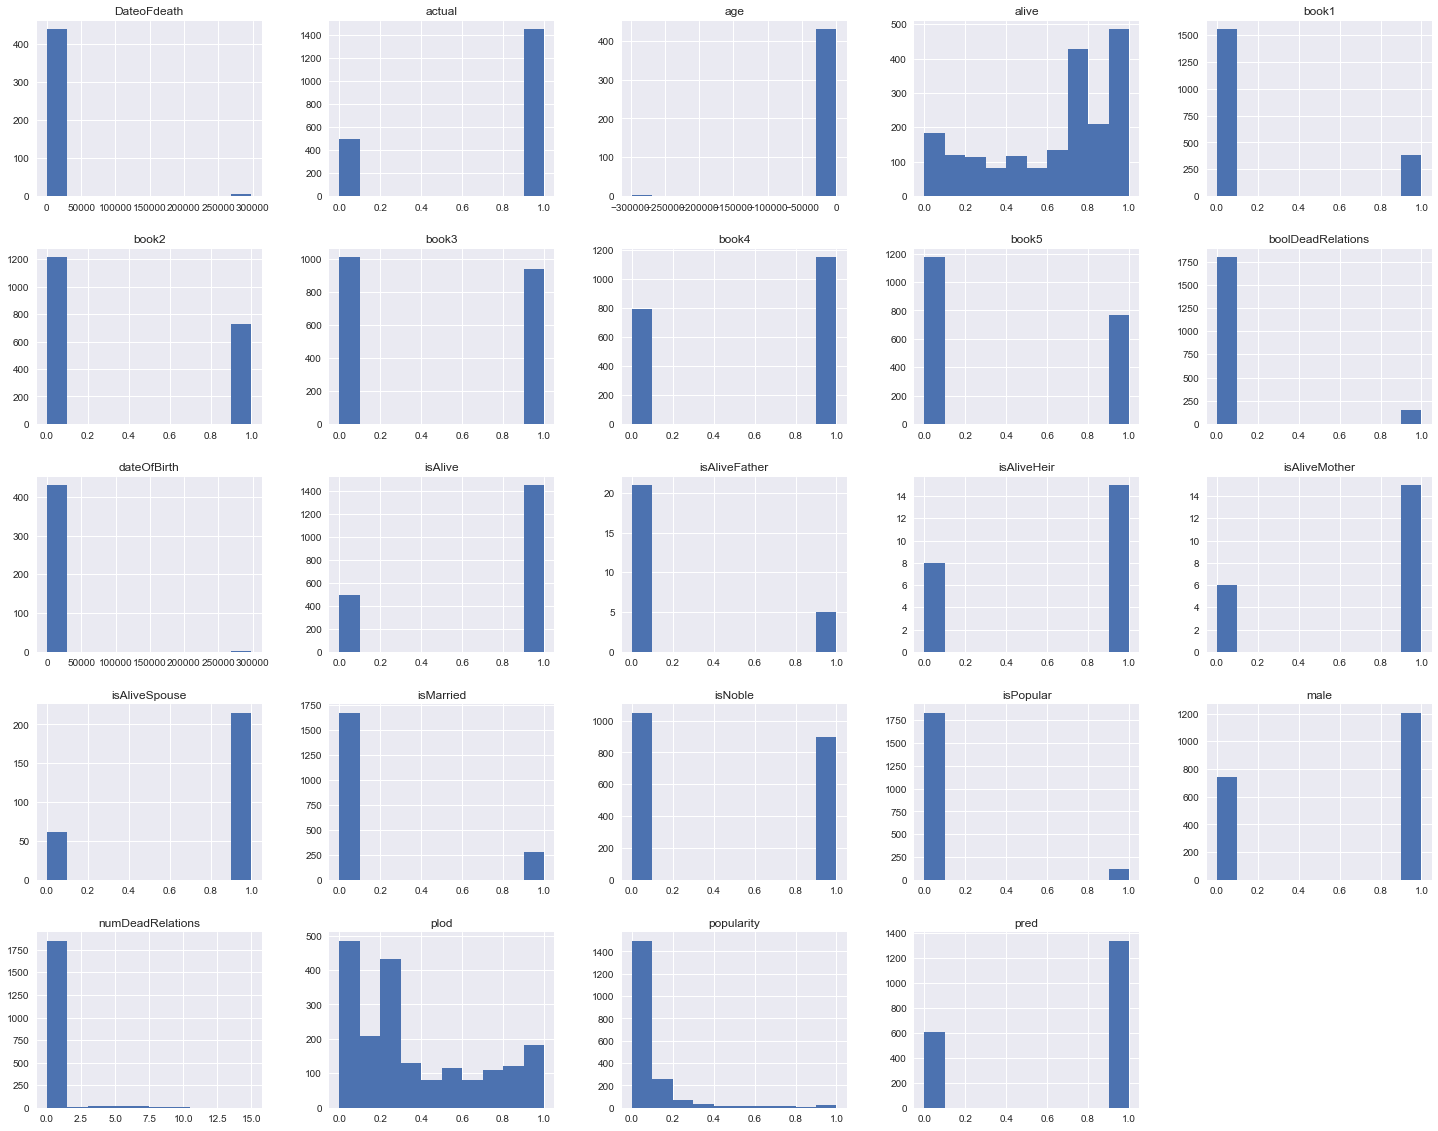

In [4]:
data.hist(figsize = (25,20));

<Figure size 1800x1440 with 0 Axes>

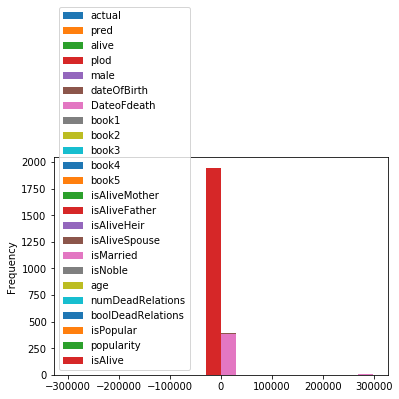

In [59]:
plt.figure(figsize = (25,20))
data.plot.hist(bins=20)

### Комментарий к решению
Тут всё верно, разве что график можно было сделать побольше, так виднее, кто там с кем скоррелирован 

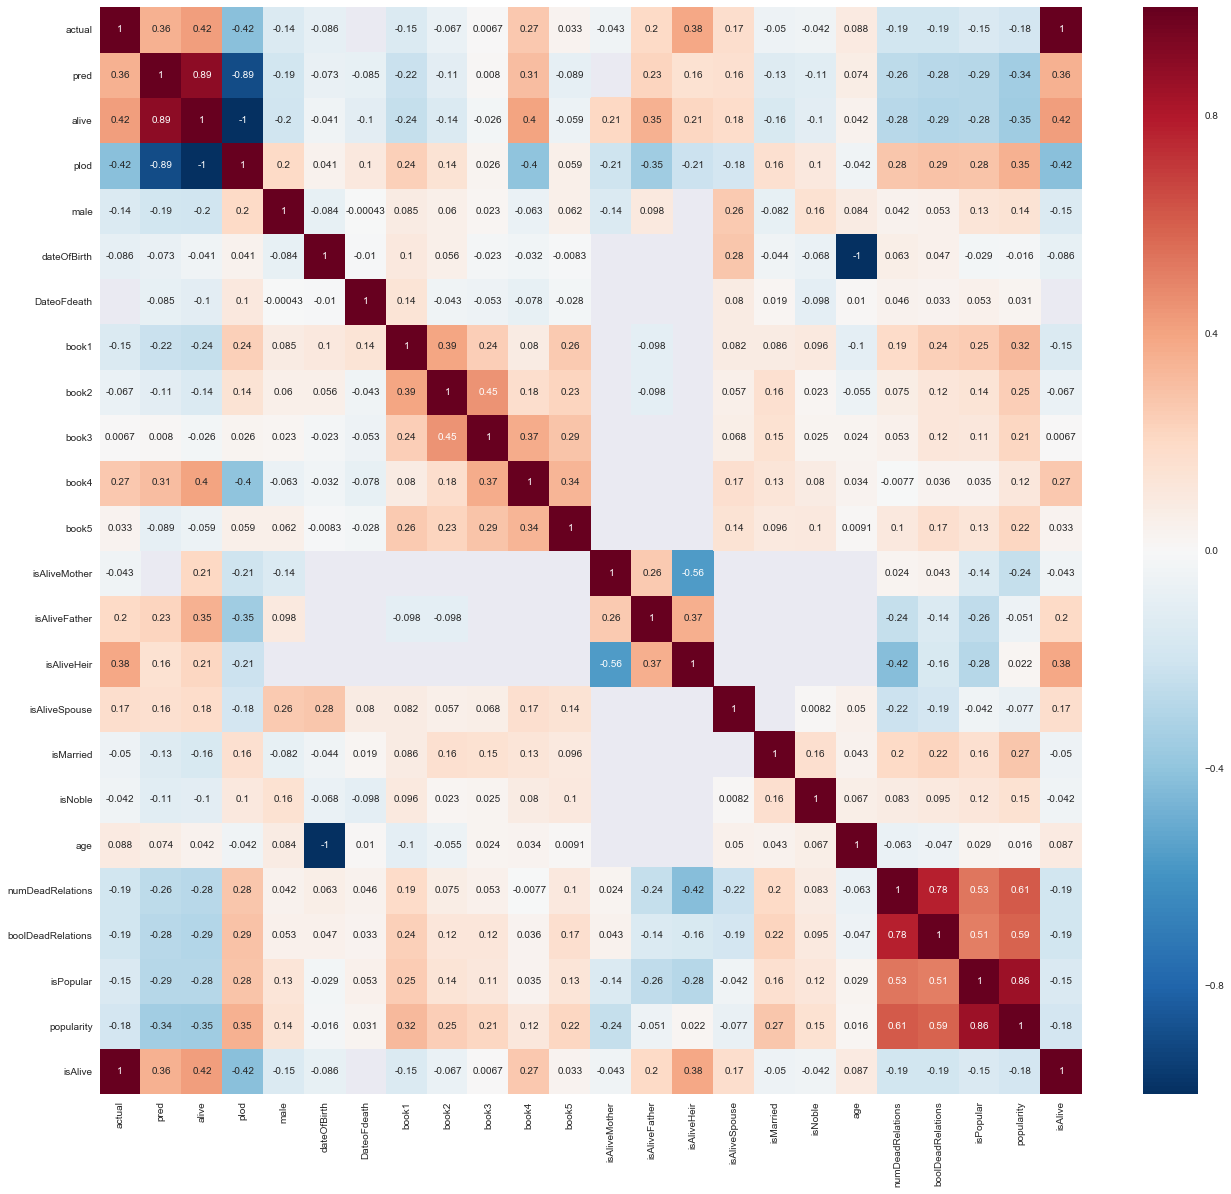

In [5]:
plt.figure(figsize=(22, 20))
sns.heatmap(data.corr(), annot=True);

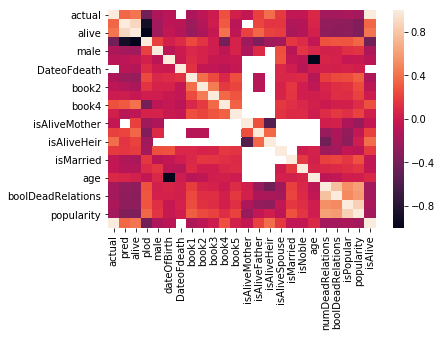

In [68]:
corr = data.corr()
sns.heatmap(corr)

### Комментарий к решению
Действительно, женатым и замужним вообще не везет, а уж мужчиной быть - вообще приговор 

Лучше родиться женщиной и не выходить замуж :)


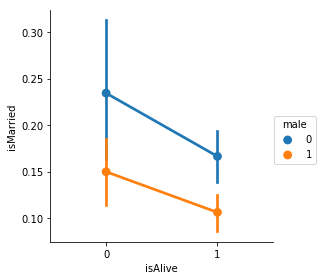

In [87]:
sns.factorplot(x="isAlive", y="isMarried", data = data, hue = "male")
print('Лучше родиться женщиной и не выходить замуж :)')

### Комментарий к решению
Наверное, это как раз число непопулярных, раз `isPopular == 0` ;)

In [98]:
print('Число полулярных героев: ', data['isPopular'][(data['isPopular']) == 0].count())

Число полулярных героев  1831


А вот погибают как раз таки популярные, чем выше isPopular, тем меньше выживших, на то это и Игра Престолов, где почти все любимчики уже полегли

Самые побигаемые - 


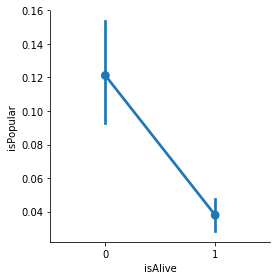

In [106]:
sns.factorplot(x="isAlive", y="isPopular", data = data)
print('Самые побигаемые - непопулярные')